In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the movie lines dataset assuming tab-separated format
lines = pd.read_csv('formatted_movie_lines.txt', sep='\t', header=None, names=['line1', 'line2'])

# Check the structure of the DataFrame
print("Dataset sample:")
print(lines.head())

# Create a random sentiment label for illustration purposes (use actual labels if available)
lines['sentiment'] = np.random.choice([0, 1], size=len(lines))  # Random binary sentiment

# Preprocessing the text: Lowercasing, removing non-alphanumeric characters
lines['cleaned_line1'] = lines['line1'].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x.lower()))
lines['cleaned_line2'] = lines['line2'].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x.lower()))

# Combine both lines into one text column (optional step)
lines['combined_text'] = lines['cleaned_line1'] + " " + lines['cleaned_line2']

# Show the cleaned text
print("\nCleaned dataset sample:")
print(lines[['combined_text', 'sentiment']].head())

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(lines['combined_text'], lines['sentiment'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Use a vocabulary of 10,000 most frequent words
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding the sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=100)  # Max sequence length: 100
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=100)



# Output the shapes of the training and test sets
print("\nPadded data shapes:")
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")


Dataset sample:
                                               line1  \
0                                        They do to!   
1                                          She okay?   
2                                                Wow   
3  I'm kidding.  You know how sometimes you just ...   
4                                                 No   

                                            line2  
0                                    They do not!  
1                                      I hope so.  
2                                       Let's go.  
3                                              No  
4  Okay -- you're gonna need to learn how to lie.  

Cleaned dataset sample:
                                       combined_text  sentiment
0                             they do to they do not          0
1                                 she okay i hope so          0
2                                        wow lets go          1
3  im kidding  you know how sometimes you just be...  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, Flatten, Dropout

# Define the CNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Embedding layer for tokenized text
    Conv1D(128, 5, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling
    Dropout(0.5),  # Dropout layer for regularization
    Flatten(),  # Flatten the output
    Dense(128, activation='relu'),  # Dense layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=50, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - accuracy: 0.5002 - loss: 0.6936 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 2/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5020 - val_loss: 0.6951
Epoch 3/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6017 - loss: 0.6552 - val_accuracy: 0.5013 - val_loss: 0.7213
Epoch 4/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6790 - loss: 0.5718 - val_accuracy: 0.5011 - val_loss: 0.7872
Epoch 5/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7296 - loss: 0.4958 - val_accuracy: 0.4975 - val_loss: 0.8859
Epoch 6/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7601 - loss: 0.4463 - val_accuracy: 0.4973 - val_loss: 0.9506
Epoch 7/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7851 - loss: 0.4082 - val_accuracy: 0.4965 - val_loss: 1.0302
Epoch 8/50
2767/2767 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8026 - loss: 0

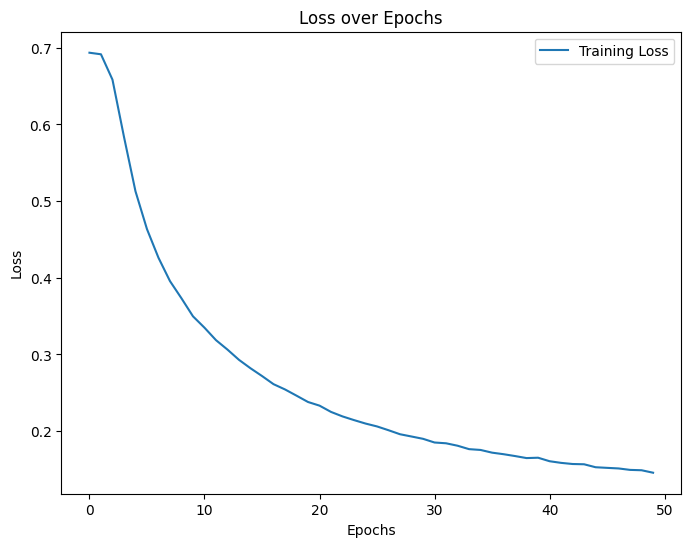

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the loss graph
def plot_loss_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    #plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss graph after training
plot_loss_history(history)